In [1]:
import math
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from scipy import interpolate
from scipy import stats
from scipy import signal
from scipy.optimize import curve_fit
from scipy.optimize import leastsq
from scipy.odr import ODR, Model, Data, RealData
from pylab import *
from openpyxl import Workbook

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy as scipy
from scipy import optimize
from matplotlib.ticker import AutoMinorLocator
from matplotlib import gridspec
import matplotlib.ticker as ticker

In [3]:
data = pd.read_excel(r"C:\Users\matth\Documents\Phys 382\Lock-In data\EPR Lock-In Data.xlsx",None)
MagResonances = []
FreqResonances = []

In [10]:
def guassDerivative(x,a,b,c): # Where a is the height of a guass peak, b is the centre position and c is the s.d.
      return (a*(x-b)*(math.e)**((-((b-x)**2))/(2*c**2)))/(c**2)

c:\Users\matth\anaconda3\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


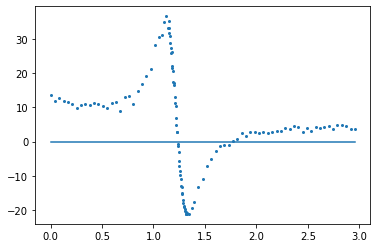

18.4


c:\Users\matth\anaconda3\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


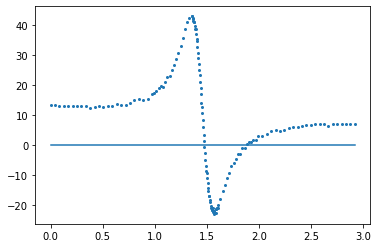

22.1


c:\Users\matth\anaconda3\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


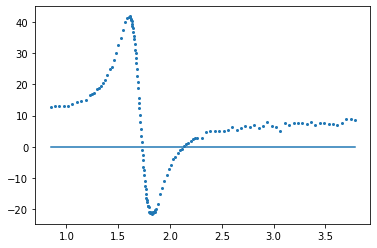

26.0


c:\Users\matth\anaconda3\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


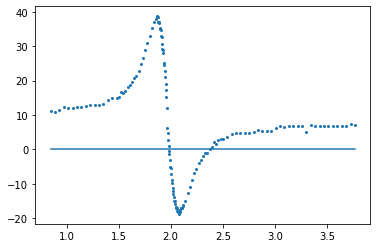

30.1


c:\Users\matth\anaconda3\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


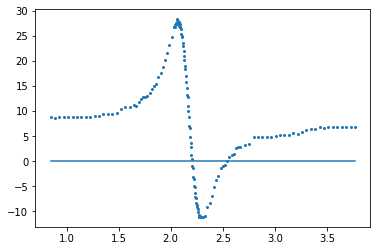

33.5


c:\Users\matth\anaconda3\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


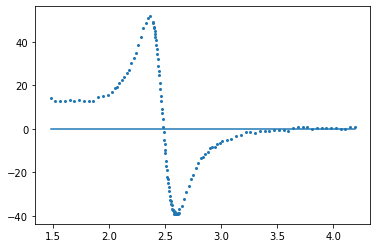

38.1


c:\Users\matth\anaconda3\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


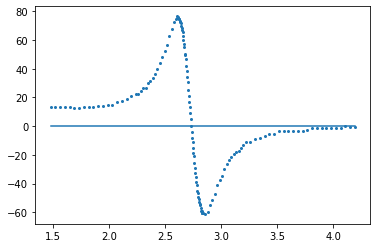

42.0


c:\Users\matth\anaconda3\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


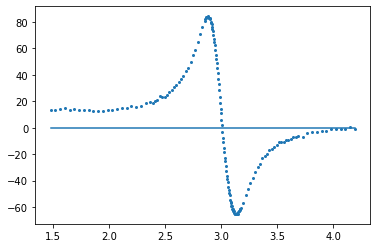

46.1


c:\Users\matth\anaconda3\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


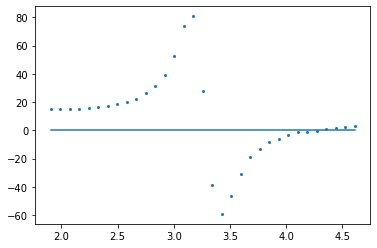

50.2


c:\Users\matth\anaconda3\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


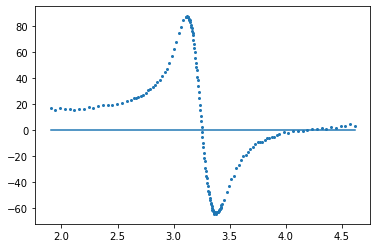

49.8


c:\Users\matth\anaconda3\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


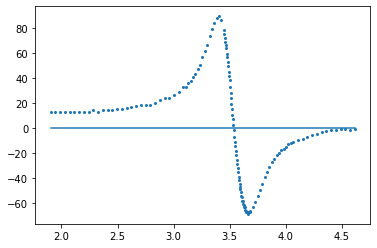

54.2


c:\Users\matth\anaconda3\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


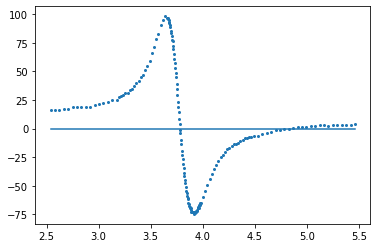

58.1


c:\Users\matth\anaconda3\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


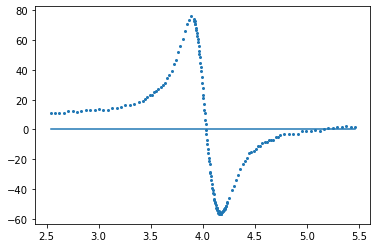

62.0


c:\Users\matth\anaconda3\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


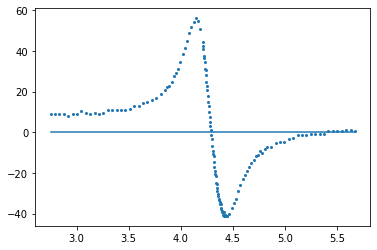

c:\Users\matth\anaconda3\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


66.0


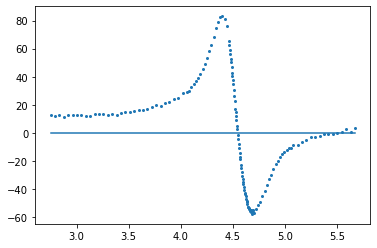

70.0
[1.220355, 1.461465, 1.71738, 1.97118, 2.172105, 2.480895, 2.7346950000000003, 3.0117599999999998, 3.2994, 3.2380649999999997, 3.534165, 3.7752749999999997, 4.03542, 4.29344999999999, 4.543019999999985, 1.220355, 1.461465, 1.71738, 1.97118, 2.172105, 2.480895, 2.7346950000000003, 3.0117599999999998, 3.2994, 3.2380649999999997, 3.534165, 3.7752749999999997, 4.03542, 4.29344999999999, 4.543019999999985, 1.220355, 1.461465, 1.71738, 1.97118, 2.172105, 2.480895, 2.7346950000000003, 3.0117599999999998, 3.2994, 3.2380649999999997, 3.534165, 3.7752749999999997, 4.03542, 4.29344999999999, 4.543019999999985, 1.220355, 1.461465, 1.71738, 1.97118, 2.172105, 2.480895, 2.7346950000000003, 3.0117599999999998, 3.2994, 3.2380649999999997, 3.534165, 3.7752749999999997, 4.03542, 4.29344999999999, 4.543019999999985]
[18.4, 22.1, 26.0, 30.1, 33.5, 38.1, 42.0, 46.1, 50.2, 49.8, 54.2, 58.1, 62.0, 66.0, 70.0, 18.4, 22.1, 26.0, 30.1, 33.5, 38.1, 42.0, 46.1, 50.2, 49.8, 54.2, 58.1, 62.0, 66.0, 70.0, 18.4,

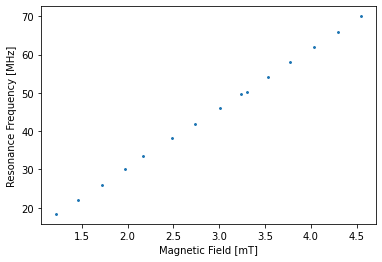

In [12]:
for i, sheet in enumerate(data):


        
        if "test" not in sheet.lower():
            AmpData = (data[sheet]["Amplitude"]).to_numpy()
            MagneticData = (data[sheet]["MagField"]).to_numpy()  

            maxLoc = MagneticData[np.argmax(AmpData)]
            minLoc = MagneticData[np.argmin(AmpData)]
            centre = (minLoc-maxLoc)/2 + maxLoc

            guess =[centre,-(np.max(AmpData)/0.60653)*minLoc-maxLoc, (minLoc-maxLoc)/2]


            popt, pcov = scipy.optimize.curve_fit(guassDerivative, MagneticData, AmpData, p0=guess) 

            Amp, Loc, SDev = popt
            AmpGuess,LocGuess,SDevGuess = guess
            plt.plot(MagneticData,guassDerivative(MagneticData,Amp,Loc,SDev))
            #plt.plot(MagneticData,guassDerivative(Amp)
            plt.scatter(MagneticData,AmpData,s=4)
            plt.show()

            print(sheet)

            MagResonances.append((minLoc-maxLoc)/2 + maxLoc)
            FreqResonances.append(float(sheet))




print(MagResonances)
print(FreqResonances)

plt.scatter(MagResonances,FreqResonances,marker = ".",s=6)

plt.xlabel("Magnetic Field [mT]")
plt.ylabel("Resonance Frequency [MHz]")

plt.show()